In [42]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [56]:
data = pd.read_csv('data/money_happy.csv')
data = np.asarray(data)
data[:,1] = data[:,1].astype(int)
data[:,2] = data[:,2].astype(float)

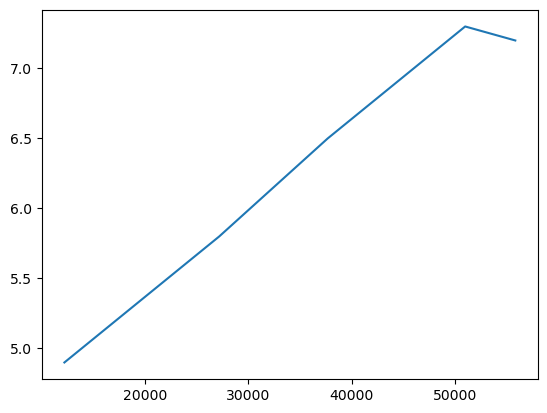

In [55]:
plt.plot(data[:,1],data[:,2])